In [144]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [145]:
dataset = pd.read_csv("https://raw.githubusercontent.com/balu54/datasets/main/Mall_Customers.csv")

In [146]:
print(sorted(list(dataset["Age"].unique())))

[18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 63, 64, 65, 66, 67, 68, 69, 70]


In [147]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [148]:
dataset = dataset.rename(columns={'Annual Income (k$)':'Annual_Income','Spending Score (1-100)':'Spending_Score'})
dataset.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [149]:
dataset.drop("CustomerID",inplace=True,axis=1)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          200 non-null    object
 1   Age             200 non-null    int64 
 2   Annual_Income   200 non-null    int64 
 3   Spending_Score  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [150]:
dataset.shape

(200, 4)

<ipython-input-151-8f82665e910d>:2: FutureWarning:

Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead



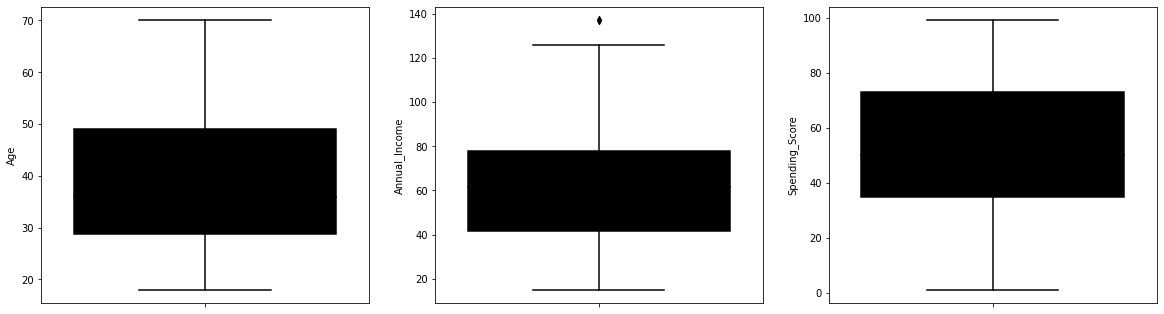

In [151]:
def box_plot(df):
  dfint = df[df.columns[df.dtypes == "int64"] | df.columns[df.dtypes == "float64"]]
  
  fig, axes = plt.subplots((len(dfint.columns)//3) +1, 3,figsize=(20, dataset.shape[1]*3))
  r,c,count = 0,0,0
  for i in range(((len(dfint.columns)//3) +1)*3):#, 3,figsize=(20, dataset.shape[1]*3)):
    # print(i)
    if i < len(df.columns)-1:
      sns.boxplot(y=dfint[dfint.columns[i]],color="black", ax=axes[r,c])
    if c == 2:
      c, r = -1, r+1
    if count > len(dfint.columns)-1:
      # print(i,"end",len(dfint.columns)-1,count)
      fig.delaxes(axes.flatten()[count])
    c+=1
    # print(count,"count")
    count+=1
box_plot(dataset)

**No Outliers in the dataset**

<ipython-input-152-096e74ad8ce7>:2: FutureWarning:

Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future

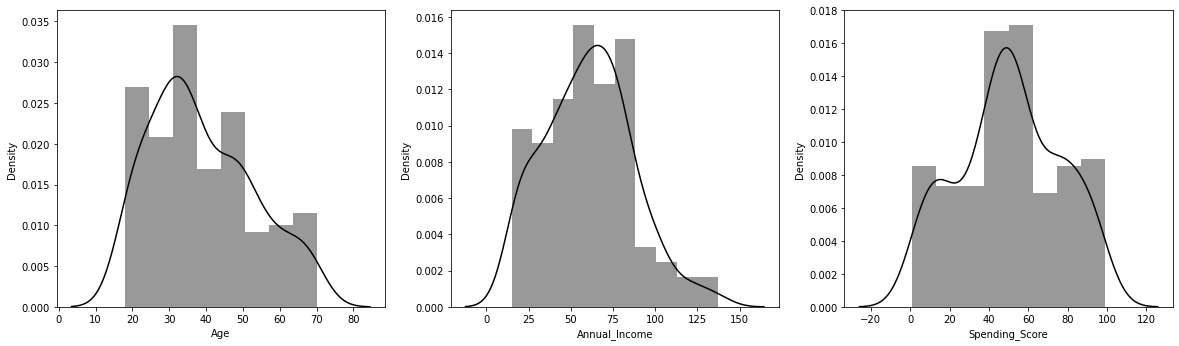

In [152]:
def dist_plot(df):
  dfint = df[df.columns[df.dtypes == "int64"] | df.columns[df.dtypes == "float64"]]
  
  fig, axes = plt.subplots((len(dfint.columns)//3) +1, 3,figsize=(20, dataset.shape[1]*3))
  r,c,count = 0,0,0
  for i in range(((len(dfint.columns)//3) +1)*3):
    if i < len(df.columns)-1:
      sns.distplot(dfint[dfint.columns[i]],color="black", ax=axes[r,c])
    if c == 2:
      c, r = -1, r+1
    if count > len(dfint.columns)-1:
      fig.delaxes(axes.flatten()[count])
    c+=1
    count+=1
dist_plot(dataset)

**Most of the customers who visit the mall have an annual income of 50 thousand to 80 thousand**

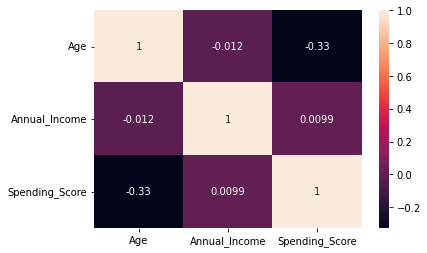

In [153]:
sns.heatmap(dataset.corr(),annot=True)

**No multicolinearity as per the Correlation**

<Figure size 864x720 with 0 Axes>

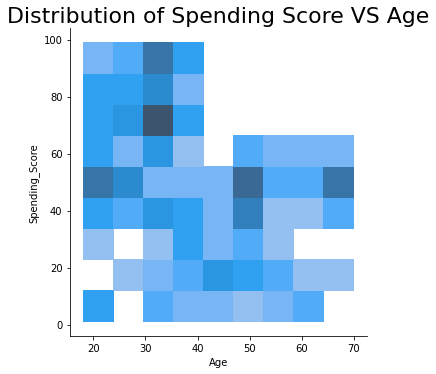

In [154]:
plt.figure(figsize=(12,10))
sns.displot(data= dataset,y='Spending_Score',x='Age')
plt.title("Distribution of Spending Score VS Age", fontsize = 22)
plt.show()

**The Age of Customer from 20 to 40 have high Spending Score**

<ipython-input-155-f4797e75c6a4>:2: FutureWarning:

Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead



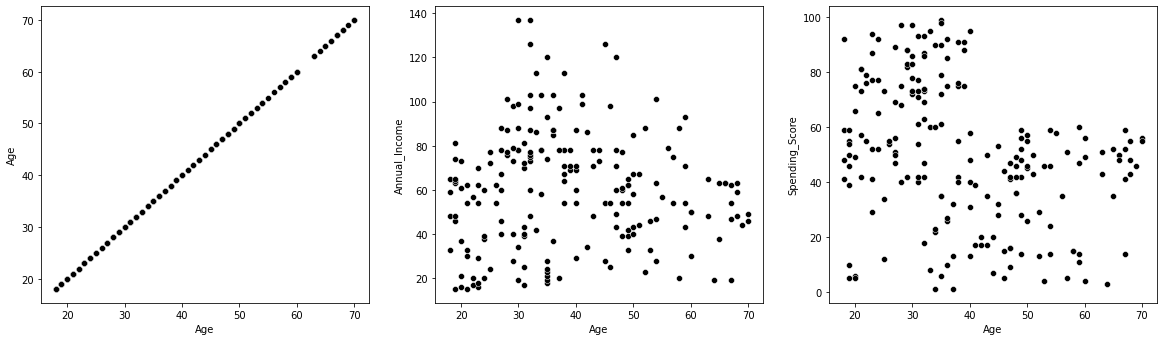

In [155]:
def scatter_plot(df,specific):
  dfint = df[df.columns[df.dtypes == "int64"] | df.columns[df.dtypes == "float64"]]
  
  fig, axes = plt.subplots((len(dfint.columns)//3) +1, 3,figsize=(20, dataset.shape[1]*3))
  r,c,count = 0,0,0
  for i in range(((len(dfint.columns)//3) +1)*3):
    if i < len(df.columns)-1:
      sns.scatterplot(y=dfint[dfint.columns[i]],x=dfint[specific],color="black", ax=axes[r,c])
    if c == 2:
      c, r = -1, r+1
    if count > len(dfint.columns)-1:
      fig.delaxes(axes.flatten()[count])
    c+=1
    count+=1
scatter_plot(dataset,"Age")

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



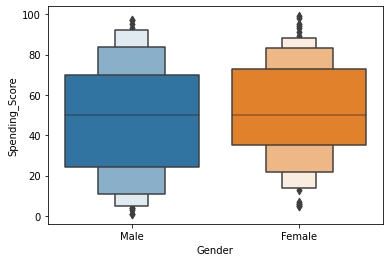

In [156]:
sns.boxenplot(dataset['Gender'], dataset['Spending_Score'])

**Female are spending more money than compare to male**

# **Building Model**

In [157]:
X = dataset.iloc[:,2:]
X

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [158]:
import plotly.figure_factory as ff
import numpy as np

ff.create_dendrogram(X)

**It's Very tough to find number of clusters by ploting horizontal-line, but by hue we can say that there are $3$ clusters in this dataset..**

In [159]:
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN

[182440.3076298702, 106348.37306211122, 73679.78903948836, 44448.4554479337, 37233.814510710006, 30259.65720728547, 25005.55037243283, 21850.165282585636, 19740.0103703593, 18452.67137764197, 15937.815838686403]


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'WCSS')

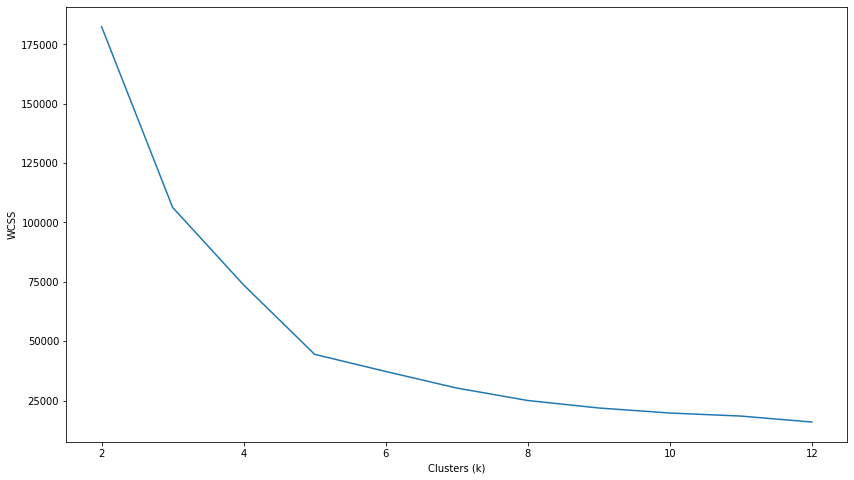

In [179]:
Inter = []
for i in range(2,13):
  model = KMeans(n_clusters = i)
  model.fit(X)
  Inter.append(model.inertia_)
print(Inter)

# plotting the Elbow
plt.figure(figsize = (14, 8))
sns.lineplot(np.arange(2,13),Inter)
plt.xlabel('Clusters (k)')
plt.ylabel('WCSS')
# plt.show()

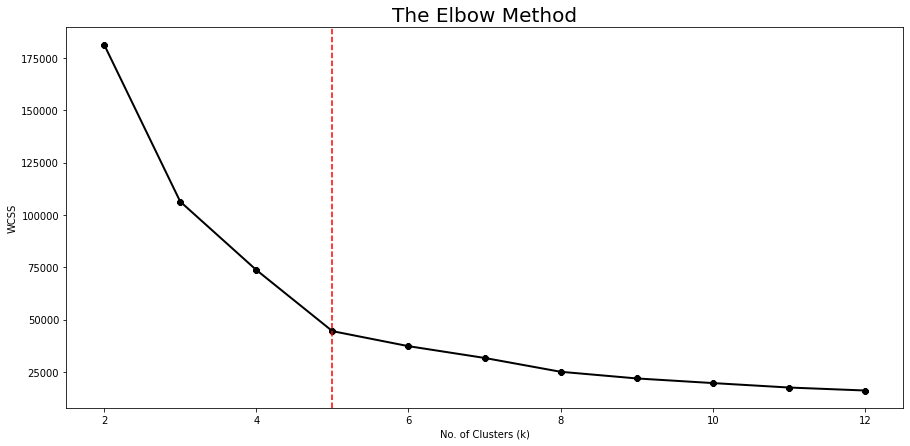

In [178]:
fig, ax = plt.subplots(figsize=(15,7))
ax = plt.plot(range(2,13),Inter, linewidth=2, color="black", marker ="8")
plt.axvline(x=5, ls='--',color="red")
plt.ylabel('WCSS')
plt.xlabel('Clusters (k)')
plt.title('The Elbow Method', fontsize = 20)
plt.show()

**5 Clusters Identified as per Elbow Method**

## $using$ **silhoutee_sample**

**Source for the below code is [Here](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py)**

For n_clusters = 2 The average silhouette_score is : 0.2968969162503008
For n_clusters = 3 The average silhouette_score is : 0.46761358158775435
For n_clusters = 4 The average silhouette_score is : 0.4931963109249047
For n_clusters = 5 The average silhouette_score is : 0.553931997444648
For n_clusters = 6 The average silhouette_score is : 0.5376203956398481
For n_clusters = 7 The average silhouette_score is : 0.5270287298101395
For n_clusters = 8 The average silhouette_score is : 0.4572211842776841
For n_clusters = 9 The average silhouette_score is : 0.45872989167156364
For n_clusters = 10 The average silhouette_score is : 0.4467356774401869
For n_clusters = 11 The average silhouette_score is : 0.42983405632843386


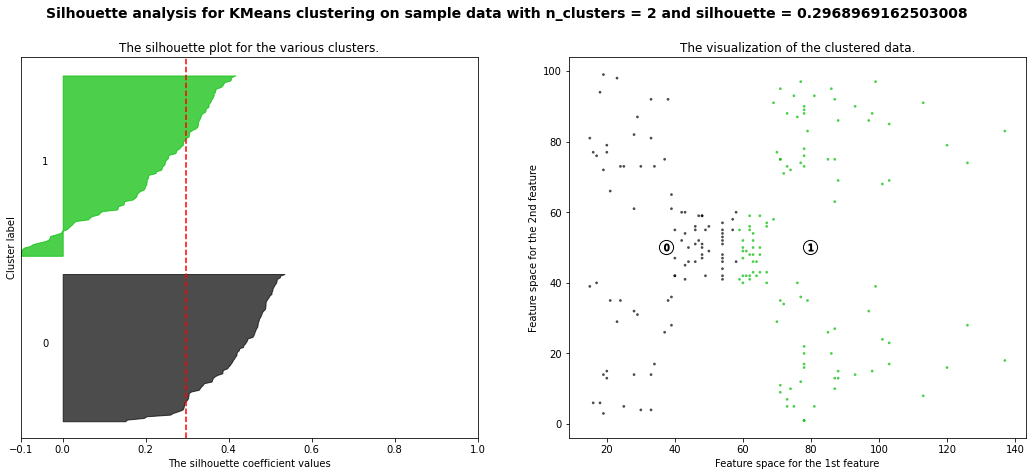

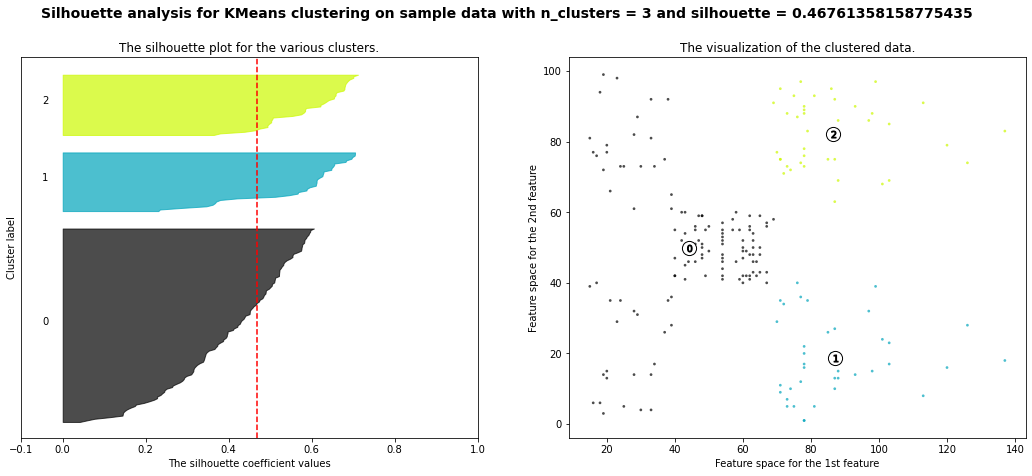

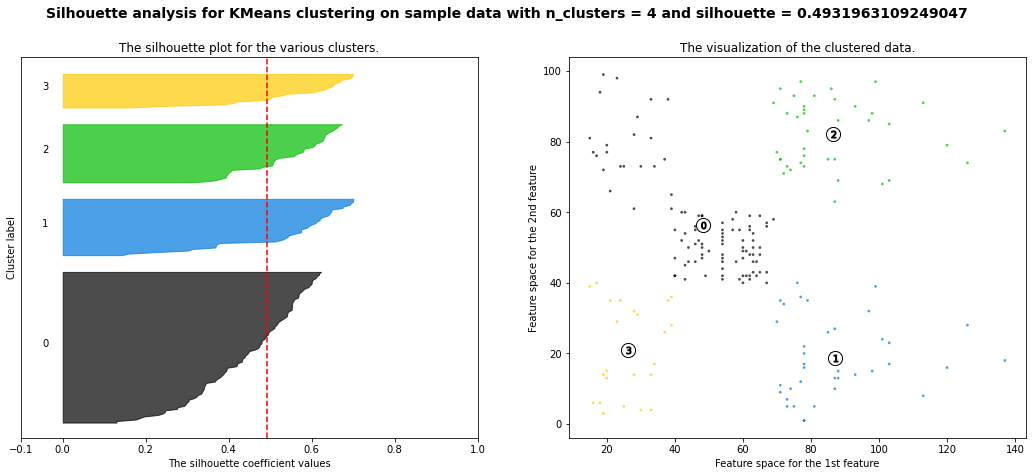

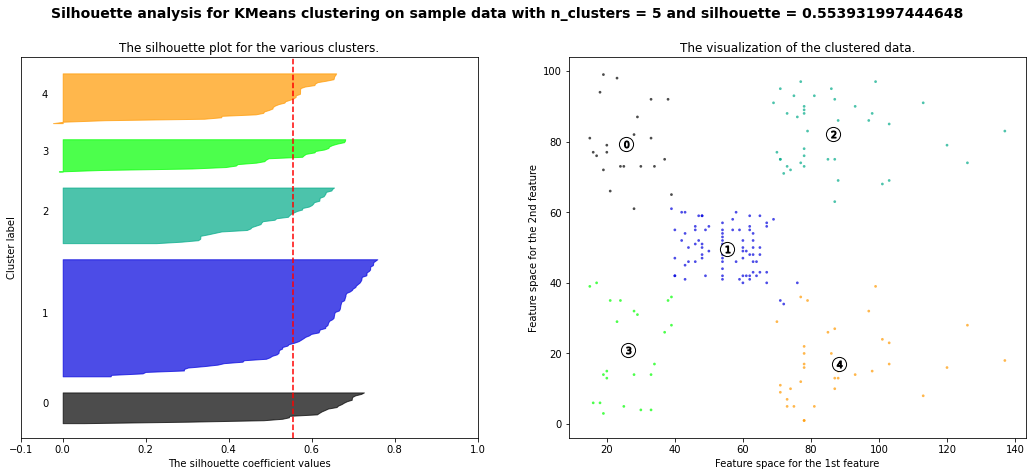

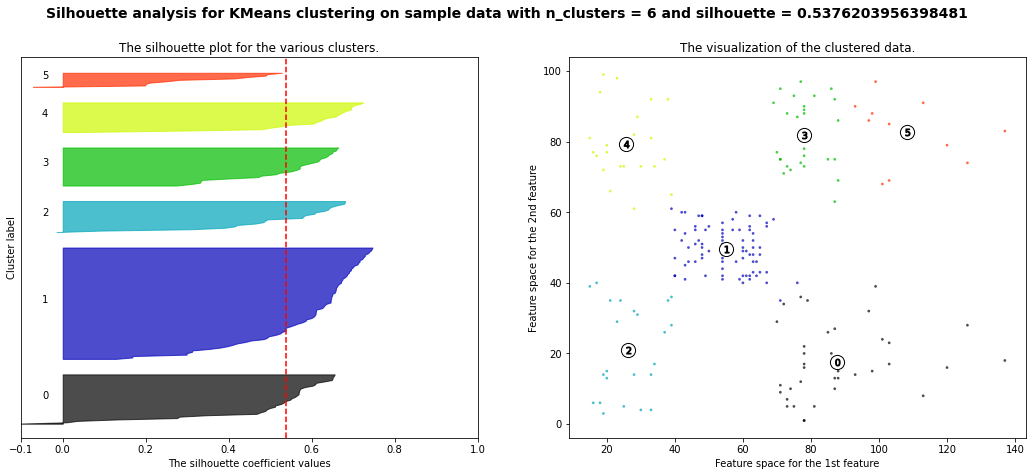

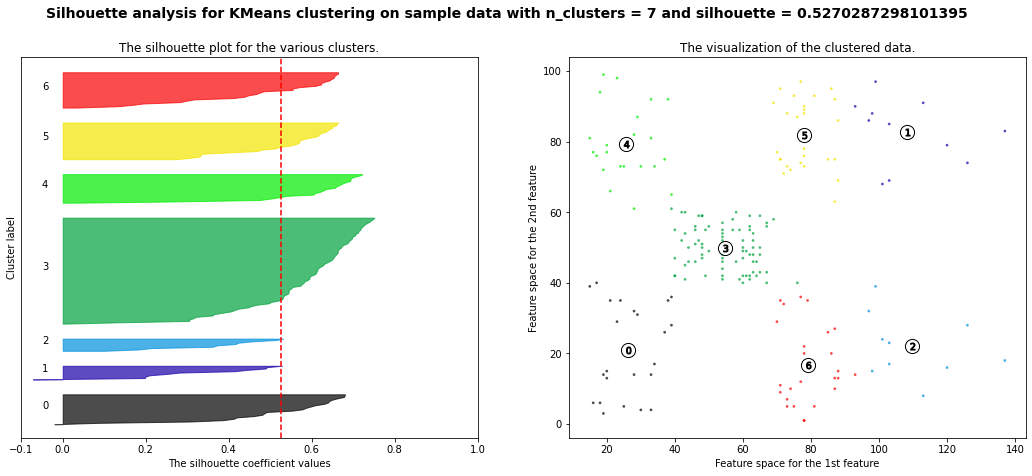

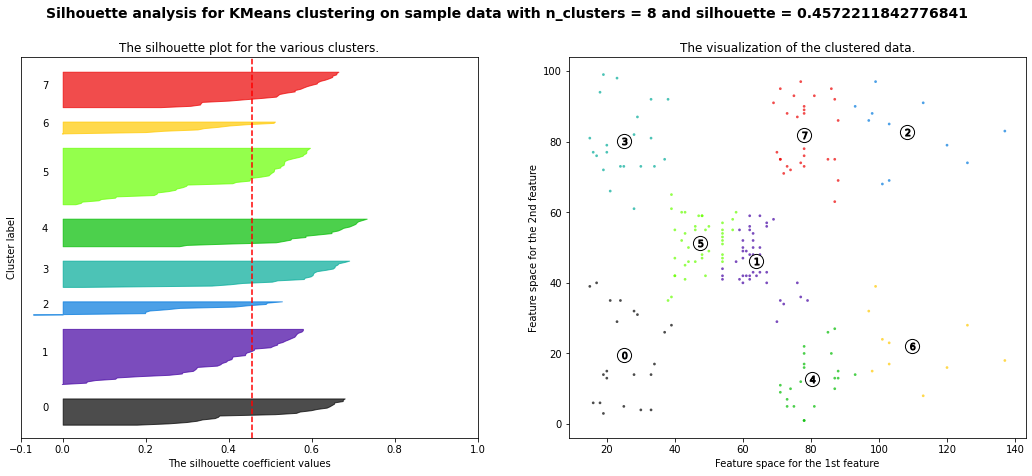

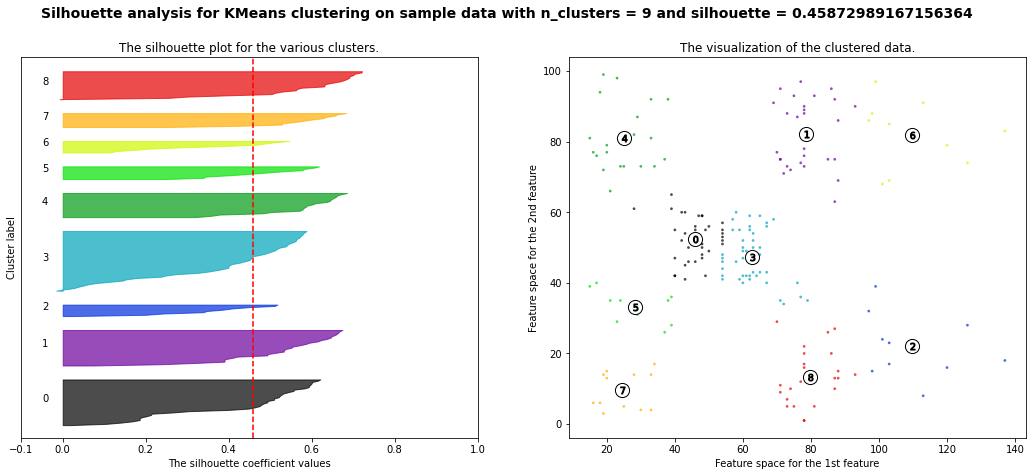

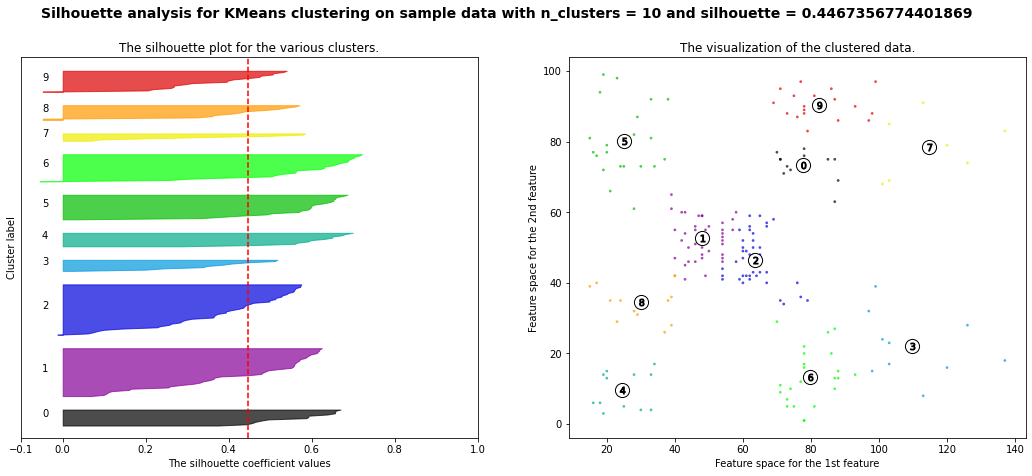

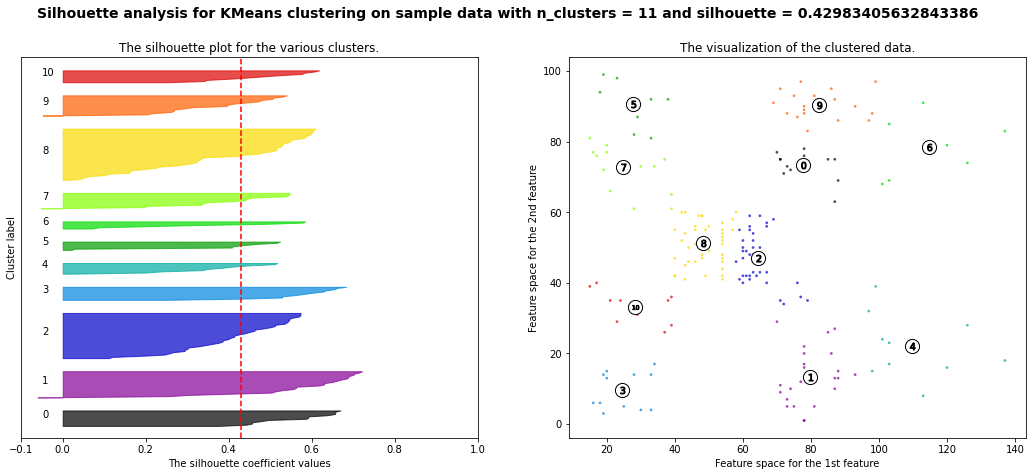

In [161]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm

range_n_clusters = range(2,12)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X.iloc[:, 0], X.iloc[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        f"Silhouette analysis for KMeans clustering on sample data with n_clusters = {n_clusters} and silhouette = {silhouette_avg}",
        fontsize=14,
        fontweight="bold",
    )

plt.show()

**Max Silhouette Score at k = 5 without negative values, Hence 5 Clusters is the right option**

## **DBSCAN**

In [162]:
import itertools
epsilons = np.linspace(0.01, 1, num=15)
min_samples = np.arange(2, 20)
combinations = list(itertools.product(epsilons, min_samples))
N = len(combinations)
def get_scores_and_labels(combinations, X):
  scores = []
  all_labels_list = []

  for i, (eps, num_samples) in enumerate(combinations):
    dbscan_cluster_model = DBSCAN(eps=eps, min_samples=num_samples).fit(X)
    labels = dbscan_cluster_model.labels_
    labels_set = set(labels)
    num_clusters = len(labels_set)
    if -1 in labels_set:
      num_clusters -= 1
    
    if (num_clusters < 2) or (num_clusters > 50):
      scores.append(-10)
      all_labels_list.append('bad')
      c = (eps, num_samples)
      # print(f"Combination {c} on iteration {i+1} of {N} has {num_clusters} clusters. Moving on")
      continue
    
    scores.append(silhouette_score(X, labels))
    all_labels_list.append(labels)
    # print(f"Index: {i}, Score: {scores[-1]}, Labels: {all_labels_list[-1]}, NumClusters: {num_clusters}")

  best_index = np.argmax(scores)
  best_parameters = combinations[best_index]
  best_labels = all_labels_list[best_index]
  best_score = scores[best_index]

  return {'best_epsilon': best_parameters[0],
          'best_min_samples': best_parameters[1], 
          'best_labels': best_labels,
          'best_score': best_score}

best_params_dbscan = get_scores_and_labels(combinations, X)
best_params_dbscan

{'best_epsilon': 1.0,
 'best_min_samples': 2,
 'best_labels': array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1,
         2, -1,  2, -1, -1, -1, -1, -1, -1,  3,  3, -1,  4,  5,  4,  5,  6,
         4,  6, -1, -1, -1, -1,  7,  8,  8,  7,  8,  9,  8,  8,  9, -1, -1,
         7, -1, -1, -1, -1, -1, -1, 10, -1, 11, -1, -1, 10, 11, 10, 11, 12,
        -1, 13, 13, 11, -1, 14, -1, 12, -1, -1, -1, 14, -1, -1, -1, -1, -1,
        15, 15, -1, -1, -1, -1, -1, -1, -1, -1, 16, -1, 16, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 17, 18, 17, -1,
        -1, 18, 17, 19, -1, 19, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        20, -1, -1, -1, 20, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]),
 'best_score': -0.369864771277187}

**For this problem DBSCAN Gives worst result so lets go for KMean**

## **KMeans and Hierarchical Clustering**

In [163]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

KMeans(n_clusters=5)

In [164]:
clusters = kmeans.predict(X)

In [165]:
centers = kmeans.cluster_centers_

In [166]:
Hierarchical_Clustering = AgglomerativeClustering(n_clusters=5)

In [167]:
clus = Hierarchical_Clustering.fit_predict(X)
clusters = kmeans.fit_predict(X)
print("\033[1m","Hierarchical_Clustering","\n",clus,"\n","KMEANS","\n",clusters)

 Hierarchical_Clustering 
 [4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 1 2
 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2] 
 KMEANS 
 [4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 3 4 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 2 1 2 3 2 1 2 1 2 3 2 1 2 1 2 1 2 1 2 3 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


**Both are giving same results**

**concatinating the clusters to the dataset**

In [168]:
dataset["clusters"] = clusters
dataset.head()

,Gender,Age,Annual_Income,Spending_Score,clusters
0,Male,19,15,39,4
1,Male,21,15,81,0
2,Female,20,16,6,4
3,Female,23,16,77,0
4,Female,31,17,40,4


# **Conclustion**

**Visiualization in 2d**

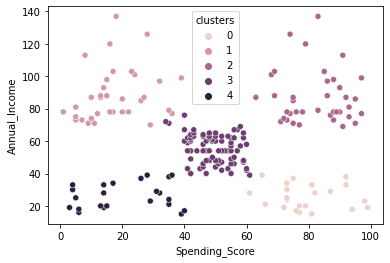

In [169]:
sns.scatterplot(x="Spending_Score", y="Annual_Income",hue = 'clusters',  data=dataset)

**Visiualization in 3d**

In [173]:
import plotly.express as px

px.scatter_3d(data_frame=dataset, x='Age', y='Annual_Income', z='Spending_Score',
              color='clusters', opacity=0.7)

## **Finally, Successfully Segmented our Customers According to their Behaviors using Clustering Technique**